In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Ciencia de datos TP

/content/drive/.shortcut-targets-by-id/1Zts-l0lnVaaTin8zIMuKBguRsve-NFs3/Ciencia de datos TP


In [ ]:
riesgo = pd.read_csv('/content/drive/.shortcut-targets-by-id/1Zts-l0lnVaaTin8zIMuKBguRsve-NFs3/Ciencia de datos TP/factorderiesgo.csv', delimiter=';')


In [ ]:

riesgo_tp=riesgo[['cod_provincia', 'bhcv01', 'tipo_hogar', 'bhih01', 'bhih03', 'bhch03', 'bhch04', 'bhch05', 'nivel_instruccion', 'condicion_actividad', 'bisg01', 'cobertura_salud','biaf01', 'barreras_actividad_fisica','bita01','biha03', 'bima10', 'bima07', 'bial05','bial08','bico03','bica01','bidi01','imc_bima','promedio_sistolica','promedio_diastolica','ta_elevada']]
#sacamos id porque no es util para el analisis

In [ ]:
#Renombramos columnas
riesgo_tp.rename(columns={"bhcv01":"Tipo_Vivienda","bhih01":"Ingresos_Hogar","bhih03":"AUH","bhch03":"Sexo","bhch04":"Edad", "bhch05":"Situacion_Conyugal","bisg01":"Salud_General","biaf01":"Actividad_Fisica_PorSemana","bita01":"Fumo_Cigarrillo","biha03":"Cantidad_Diagnosticos_PresionAlta", "bima10":"Peso", "bima07":"Altura", "bial05":"Cantidad_Dias_Verdura", "bial08":"Alimentacion", "bico03":"Colesterol", "bica01":"Bebio_Alcohol", "bidi01":"Diabetes","imc_bima":"Masa_Corporal","ta_elevada":"Presion_Arterial"}, inplace=True)


In [ ]:
riesgo_tp.shape

(29224, 27)

In [ ]:
riesgo_tp.head()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial
0,2,3,2,50000,2,1,32,6,7,1,3,2,4,1,2,3,106.0,181.0,7.0,2,2,1,2,32.36,147.5,98.5,1.0
1,2,1,4,40000,2,2,65,2,7,1,1,1,3,1,1,3,NaN,NaN,5.0,2,1,1,2,NaN,NaN,NaN,NaN
2,2,3,2,40000,2,2,33,6,7,1,2,1,0,9,1,3,NaN,NaN,5.0,2,2,1,2,NaN,NaN,NaN,NaN
3,2,3,1,80000,2,2,64,3,7,1,3,1,0,1,1,3,NaN,NaN,7.0,2,1,1,2,NaN,NaN,NaN,NaN
4,2,3,8,30000,2,1,24,6,5,1,3,1,0,1,1,3,NaN,NaN,3.0,2,2,1,2,NaN,NaN,NaN,NaN


In [ ]:
riesgo_tp['cod_provincia'] = riesgo_tp['cod_provincia'].map({2 : 'Ciudad de Buenos Aires' ,6 : 'Buenos Aires',10 : 'Catamarca',14 : 'Cordoba',18 : 'Corrientes',22 : 'Chaco',26 : 'Chubut',30 : 'Entre Rios',34 : 'Formosa',38 : 'Jujuy',42 : 'La Pampa',46 : 'La Rioja',50 : 'Mendoza',54 : 'Misiones',58 : 'Neuquen',62 : 'Rio Negro',66 : 'Salta',70 : 'San Juan',74 : 'San Luis',78 : 'Santa Cruz',82 : 'Santa Fe',86 : 'Santiago del Estero',90 : 'Tucuman',94 : 'Tierra del Fuego'})
riesgo_tp['Tipo_Vivienda'] = riesgo_tp['Tipo_Vivienda'].map({1 : 'Casa' ,2 : 'Casilla',3 : 'Departamento',4 : 'Pieza de inquilinato',5 : 'Pieza en hotel o pensión',6 : 'Local no construido para habitación',7 : 'Otros'})
riesgo_tp['tipo_hogar'] = riesgo_tp['tipo_hogar'].map({1 : 'Hogar unipersonal' ,2 : 'Cony completo s/hijos ni otros',3 : 'Cony completo s/hijos y c/otros',4 : 'Cony completo c/hijos s/otros',5 : 'Cony completo c/hijos y otros',6 : 'Cony incompleto sin otros',7 : 'Cony incompleto c/otros',8 : 'No conyugal'})
riesgo_tp['AUH'] = riesgo_tp['AUH'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Sexo'] = riesgo_tp['Sexo'].map({1 : 'Hombre' ,2 : 'Mujer'})
riesgo_tp['Situacion_Conyugal'] = riesgo_tp['Situacion_Conyugal'].map({1 : 'Unido/a' ,2 : 'Casado/a',3 : 'Separado/a',4 : 'Divorciado/a',5 : 'Viudo/a',6 : 'Soltero/a'})
riesgo_tp['nivel_instruccion'] = riesgo_tp['nivel_instruccion'].map({1 : 'Sin instrucción' ,2 : 'Primario incompleto',3 : 'Primario completo',4 : 'Secundario incompleto',5 : 'Secundario completo',6 : 'Terciario/universitario incompleto',7 : 'Terciario/universitario completo',8 : 'Educación especial'})
riesgo_tp['Cantidad_Diagnosticos_PresionAlta'] = riesgo_tp['Cantidad_Diagnosticos_PresionAlta'].map({1 : 'Sólo 1 vez' ,2 : 'Más de 1 vez',3 : 'Ninguna',99 : 'NS/NC'})
riesgo_tp['Alimentacion'] = riesgo_tp['Alimentacion'].map({1 : 'Muy saludable' ,2 : 'Bastante saludable',3 : 'Poco saludable',4 : 'Nada saludable',99 : 'NS/NC'})
riesgo_tp['Colesterol'] = riesgo_tp['Colesterol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['condicion_actividad'] = riesgo_tp['condicion_actividad'].map({1 : 'Ocupado' ,2 : 'Desocupado',3 : 'Inactivo'})
riesgo_tp['Salud_General'] = riesgo_tp['Salud_General'].map({1 : 'Excelente' ,2 : 'Muy buena',3 : 'Buena',4 : 'Regular',5 : 'Mala'})
riesgo_tp['Fumo_Cigarrillo'] = riesgo_tp['Fumo_Cigarrillo'].map({1 : 'Si' ,2 : 'No'})
riesgo_tp['Bebio_Alcohol'] = riesgo_tp['Bebio_Alcohol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Diabetes'] = riesgo_tp['Diabetes'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Presion_Arterial'] = riesgo_tp['Presion_Arterial'].map({1 : 'Elevada' ,2 : 'No elevada'})

In [ ]:
riesgo_tp.dropna(how ='any', inplace = True)

In [ ]:
np.shape(riesgo_tp)

(15912, 27)

In [ ]:
riesgo_tp.columns.tolist()

['cod_provincia',
 'Tipo_Vivienda',
 'tipo_hogar',
 'Ingresos_Hogar',
 'AUH',
 'Sexo',
 'Edad',
 'Situacion_Conyugal',
 'nivel_instruccion',
 'condicion_actividad',
 'Salud_General',
 'cobertura_salud',
 'Actividad_Fisica_PorSemana',
 'barreras_actividad_fisica',
 'Fumo_Cigarrillo',
 'Cantidad_Diagnosticos_PresionAlta',
 'Peso',
 'Altura',
 'Cantidad_Dias_Verdura',
 'Alimentacion',
 'Colesterol',
 'Bebio_Alcohol',
 'Diabetes',
 'Masa_Corporal',
 'promedio_sistolica',
 'promedio_diastolica',
 'Presion_Arterial']

In [ ]:
riesgo_tp = riesgo_tp[riesgo_tp.Diabetes != 'NS/NC']

In [ ]:
riesgo_tp = riesgo_tp[riesgo_tp.Colesterol != 'NS/NC']

In [ ]:
riesgo_tp = riesgo_tp[riesgo_tp.Fumo_Cigarrillo != 'NS/NC']

In [ ]:
riesgo_tp = riesgo_tp[riesgo_tp.Bebio_Alcohol!= 'NS/NC']

In [ ]:
riesgo_tp.describe()

,Ingresos_Hogar,Edad,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Peso,Altura,Cantidad_Dias_Verdura,Masa_Corporal,promedio_sistolica,promedio_diastolica
count,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,22123.952341,46.150919,1.318045,0.719685,5.159951,76.088207,164.127410,4.587663,28.218928,130.522836,84.097175
std,19291.209731,17.901357,0.465732,1.578185,4.044243,17.358849,9.686983,2.203642,5.894679,20.812367,12.509259
min,0.000000,18.000000,1.000000,0.000000,1.000000,33.000000,114.000000,0.000000,14.150000,67.000000,31.000000
25%,10000.000000,31.000000,1.000000,0.000000,1.000000,64.000000,157.000000,3.000000,24.020000,116.000000,75.500000
50%,17000.000000,44.000000,1.000000,0.000000,5.000000,74.000000,164.000000,5.000000,27.430000,127.000000,83.000000
75%,30000.000000,60.000000,2.000000,0.000000,9.000000,86.000000,171.000000,7.000000,31.550000,141.500000,91.500000
max,350000.000000,104.000000,2.000000,7.000000,13.000000,200.000000,201.000000,7.000000,86.570000,249.000000,167.500000


In [ ]:
np.shape(riesgo_tp)

(15611, 27)

In [ ]:
y = riesgo_tp['promedio_sistolica']

In [ ]:
Provincia=pd.get_dummies(riesgo_tp.cod_provincia)
Edad=riesgo_tp.Edad
Peso=riesgo_tp.Peso
Altura=riesgo_tp.Altura
Actividad_Fisica=riesgo_tp.Actividad_Fisica_PorSemana
Sexo = pd.get_dummies(riesgo_tp.Sexo)
Presion=riesgo_tp.promedio_sistolica
Cigarrillo=pd.get_dummies(riesgo_tp.Fumo_Cigarrillo)
Alcohol=pd.get_dummies(riesgo_tp.Bebio_Alcohol)
Ingresos=riesgo_tp.Ingresos_Hogar
Trabajo=pd.get_dummies(riesgo_tp.condicion_actividad)
Verdura=riesgo_tp.Cantidad_Dias_Verdura
Colesterol=pd.get_dummies(riesgo_tp.Colesterol)
Diabetes=pd.get_dummies(riesgo_tp.Diabetes)


In [ ]:
x = pd.concat([Edad,Altura,Peso,Actividad_Fisica,Sexo,Cigarrillo, Colesterol, Diabetes], axis = 1)
x.head()



,Edad,Altura,Peso,Actividad_Fisica_PorSemana,Hombre,Mujer,No,Si,No,Si,No,Si
0,32,181.0,106.0,4,1,0,1,0,1,0,1,0
7,42,159.0,58.0,0,0,1,0,1,0,1,1,0
8,32,184.0,71.0,0,1,0,0,1,1,0,1,0
11,76,164.0,95.0,0,1,0,1,0,1,0,1,0
13,63,168.0,86.0,0,0,1,0,1,1,0,0,1


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=0)

In [ ]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# auto scalo mis muestras de train utilizando el scaler fiteado con el xtrain
xtrain_scal = scaler.transform(xtrain) 

In [ ]:
# auto scalo mis muestras de test utilizando el scaler fiteado con el xtrain
xtest_scal = scaler.transform(xtest) 

In [ ]:
results_df = pd.DataFrame(columns=['Model','R2','MSE','MAE'])

### SVR

In [ ]:
est = SVR(max_iter=25000)
parameters_svr_rbf = {'kernel':['linear', 'rbf'] , 'C': [1,100],'gamma': [0.1,0.5]}
gs = GridSearchCV(est, param_grid=parameters_svr_rbf,refit=True,
                  cv=5, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [ ]:
# Entrenamos
gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1, 100], 'gamma': [0.1, 0.5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

-322.8015892732232 



In [ ]:
svr_prediction = gs.best_estimator_.predict(xtest_scal)
svr_prediction

array([121.98990402, 131.23029034, 133.33856856, ..., 125.4181562 ,
       137.46385297, 125.23709239])

In [ ]:
svr_r2 = r2_score(y_true=ytest, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_prediction)

R2 score: 0.241406
MSE: 333.135454
MAE: 13.290861


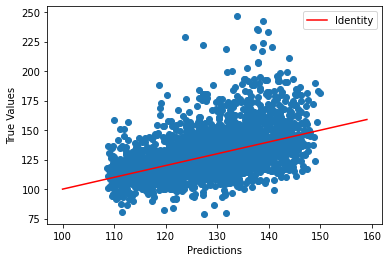

In [ ]:
plt.scatter(svr_prediction, ytest)
plt.plot(np.arange(100,160),np.arange(100,160), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MSE: {svr_mse:.6f}')
print(f'MAE: {svr_mae:.6f}')

In [ ]:
results_df = results_df.append({'Model':'SVR',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

### KNN

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]

In [ ]:
gs_knn=GridSearchCV(knn,param_grid=parameters_knn,refit=True,
                  cv=5, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [ ]:
# Entrenamos
gs_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(gs_knn.best_estimator_, "\n")
print(gs_knn.best_params_, "\n")
print(gs_knn.best_score_, "\n")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform') 

{'n_neighbors': 30} 

-324.543219797943 



In [ ]:
knn_prediction = gs_knn.best_estimator_.predict(xtest_scal)
knn_r2 = r2_score(y_true=ytest, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=ytest, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=ytest, y_pred=knn_prediction)

R2 score: 0.238448
MSE: 334.434778
MAE: 13.561749


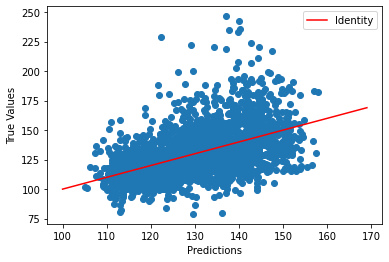

In [ ]:
plt.scatter(knn_prediction, ytest)
plt.plot(np.arange(100,170),np.arange(100,170), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {knn_r2:.6f}')
print(f'MSE: {knn_mse:.6f}')
print(f'MAE: {knn_mae:.6f}')

In [ ]:
results_df = results_df.append({'Model':'KNN',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)

In [ ]:
results_df

,Model,R2,MSE,MAE
0,SVR,0.241406,333.135454,13.290861
1,KNN,0.238448,334.434778,13.561749
